In [1]:
#Created: 15Apr2022
#Author: Lynn Menchaca

#Resources:
#Kaggle Competition-> Spaceship Titanic

#Purpose: Clean and Analyze Data File

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style

In [3]:
data_file_path = '/Users/lynnpowell/Documents/DS_Projects/Spaceship_Titanic/'
df_train = pd.read_csv(data_file_path+'train.csv')
df_test = pd.read_csv(data_file_path+'test.csv')

df_train.head(10)

PassengerId HomePlanet CryoSleep  Cabin    Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P    TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S    TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S    TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S    TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S    TRAPPIST-1e  16.0  False   
5     0005_01      Earth     False  F/0/P  PSO J318.5-22  44.0  False   
6     0006_01      Earth     False  F/2/S    TRAPPIST-1e  26.0  False   
7     0006_02      Earth      True  G/0/S    TRAPPIST-1e  28.0  False   
8     0007_01      Earth     False  F/3/S    TRAPPIST-1e  35.0  False   
9     0008_01     Europa      True  B/1/P    55 Cancri e  14.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck                Name  \
0          0.0        0.0           0.0     0.0     0.0     Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0        Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0       Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0        Solam Susent   
4        303.0       70.0         151.0   565.0     2.0   Willy Santantines   
5          0.0      483.0           0.0   291.0     0.0   Sandie Hinetthews   
6         42.0     1539.0           3.0     0.0     0.0  Billex Jacostaffey   
7          0.0        0.0           0.0     0.0     NaN  Candra Jacostaffey   
8          0.0      785.0          17.0   216.0     0.0       Andona Beston   
9          0.0        0.0           0.0     0.0     0.0      Erraiam Flatic   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         True  
5         True  
6         True  
7         True  
8         True  
9         True

In [4]:
#Test data frame is missing one column: Transported (the result)
print(df_train.shape)
print(df_test.shape)
df_train.dtypes

(8693, 14)
(4277, 13)


PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [5]:
#find all the missing values in each column
df_train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [6]:
#Looking at how many rows have multiple missing data columns
df_train.isnull().sum(axis=1).value_counts()
#df[df.isnull().sum(axis=1)==3]
#Total Number of rows with missing data: 2087

0    6606
1    1867
2     203
3      17
dtype: int64

In [7]:
#Checking assumption if the passenger is in suspended animation they don't spend money
df_cryo = df_train[df_train['CryoSleep']==True]
df_cryo[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum()

RoomService     0.0
FoodCourt       0.0
ShoppingMall    0.0
Spa             0.0
VRDeck          0.0
dtype: float64

In [8]:
#Fill the null spending values for the passengers in Cryo Sleep with 0
spend = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

for x in spend:
    df_train.loc[(df_train[x].isna() & df_train['CryoSleep']==True),x]=0
    df_test.loc[(df_test[x].isna() & df_test['CryoSleep']==True),x]=0

df_cryo = df_train[df_train['CryoSleep']==True]
df_cryo[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum()

RoomService     0.0
FoodCourt       0.0
ShoppingMall    0.0
Spa             0.0
VRDeck          0.0
dtype: float64

In [9]:
df_train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     113
FoodCourt       113
ShoppingMall    112
Spa             118
VRDeck          126
Name            200
Transported       0
dtype: int64

In [10]:
#How many rows have missing data
df_train.isnull().sum(axis=1).value_counts()
#Total Number of rows with missing data: 1786

0    6907
1    1620
2     155
3      11
dtype: int64

In [11]:
#Looking for more patters with Cryo Sleep
df_cryo.head(10)

PassengerId HomePlanet CryoSleep  Cabin    Destination   Age    VIP  \
7      0006_02      Earth      True  G/0/S    TRAPPIST-1e  28.0  False   
9      0008_01     Europa      True  B/1/P    55 Cancri e  14.0  False   
10     0008_02     Europa      True  B/1/P    TRAPPIST-1e  34.0  False   
18     0016_01       Mars      True  F/5/P    TRAPPIST-1e  45.0  False   
21     0020_01      Earth      True  E/0/S    TRAPPIST-1e   1.0  False   
22     0020_02      Earth      True  E/0/S    55 Cancri e  49.0  False   
23     0020_03      Earth      True  E/0/S    55 Cancri e  29.0  False   
25     0020_05      Earth      True  E/0/S  PSO J318.5-22   1.0  False   
28     0024_01     Europa      True  C/2/S    TRAPPIST-1e  62.0  False   
36     0034_01     Europa      True  D/1/S    55 Cancri e  28.0  False   

    RoomService  FoodCourt  ShoppingMall  Spa  VRDeck                Name  \
7           0.0        0.0           0.0  0.0     0.0  Candra Jacostaffey   
9           0.0        0.0           0.0  0.0     0.0      Erraiam Flatic   
10          0.0        0.0           0.0  0.0     0.0      Altardr Flatic   
18          0.0        0.0           0.0  0.0     0.0          Alus Upead   
21          0.0        0.0           0.0  0.0     0.0   Almary Brantuarez   
22          0.0        0.0           0.0  0.0     0.0   Glendy Brantuarez   
23          0.0        0.0           0.0  0.0     0.0  Mollen Mcfaddennon   
25          0.0        0.0           0.0  0.0     0.0     Mael Brantuarez   
28          0.0        0.0           0.0  0.0     0.0     Penton Fullided   
36          0.0        0.0           0.0  0.0     0.0     Ziba Oingwhedly   

    Transported  
7          True  
9          True  
10         True  
18         True  
21        False  
22        False  
23        False  
25        False  
28         True  
36         True

In [12]:
#Looking for titles, prefixes or suffixes in the name column
df_train['Name_len']=df_train['Name'].str.split().str.len()
df_train['Name_len'].value_counts()

2.0    8493
Name: Name_len, dtype: int64

In [13]:
#Removing Name column since it is similar to the PassengerID column, since it does not include name title or prefixes
#Removing Name column because it has missing data
#Removing Name column becuase it does not include name title, prefixes or suffixes
df_train = df_train.drop(['Name','Name_len'],axis=1)
df_test = df_test.drop('Name',axis=1)

df_train.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Transported'],
      dtype='object')

Percentage of Passengers Transported:
True     0.503624
False    0.496376
Name: Transported, dtype: float64


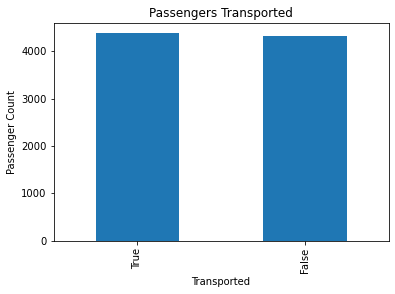

In [14]:
#General Look at Transported vs Stayed
trans_percent = df_train.Transported.value_counts() / len(df_train)
print('Percentage of Passengers Transported:')
print(trans_percent)

df_train.Transported.value_counts().plot(kind='bar')
plt.ylabel('Passenger Count')
plt.xlabel('Transported')
plt.title('Passengers Transported')
plt.show()
#No significant class imbalance

In [15]:
#Pulling group information from the passenger IDs
df_train['ID_Group']=df_train['PassengerId'].str.split('_').str[0]
df_test['ID_Group']=df_test['PassengerId'].str.split('_').str[0]
df_train['ID_Group'].describe()

count     8693
unique    6217
top       4498
freq         8
Name: ID_Group, dtype: object

In [16]:
#Description and Visual of Ages Transported
print(df_train['Age'].describe())
print('\n')
df_train[df_train['Age']<1].head()

count    8514.000000
mean       28.827930
std        14.489021
min         0.000000
25%        19.000000
50%        27.000000
75%        38.000000
max        79.000000
Name: Age, dtype: float64




PassengerId HomePlanet CryoSleep   Cabin    Destination  Age    VIP  \
19      0017_01      Earth     False   G/0/P    TRAPPIST-1e  0.0  False   
61      0067_01      Earth      True  G/10/S  PSO J318.5-22  0.0  False   
86      0092_02      Earth      True   G/9/P    TRAPPIST-1e  0.0  False   
102     0108_03      Earth     False  G/19/S    TRAPPIST-1e  0.0    NaN   
157     0179_02      Earth     False  G/26/P    TRAPPIST-1e  0.0  False   

     RoomService  FoodCourt  ShoppingMall  Spa  VRDeck  Transported ID_Group  
19           0.0        0.0           0.0  0.0     0.0         True     0017  
61           0.0        0.0           0.0  0.0     0.0         True     0067  
86           0.0        0.0           0.0  0.0     0.0         True     0092  
102          0.0        0.0           0.0  0.0     0.0         True     0108  
157          0.0        0.0           0.0  0.0     0.0        False     0179

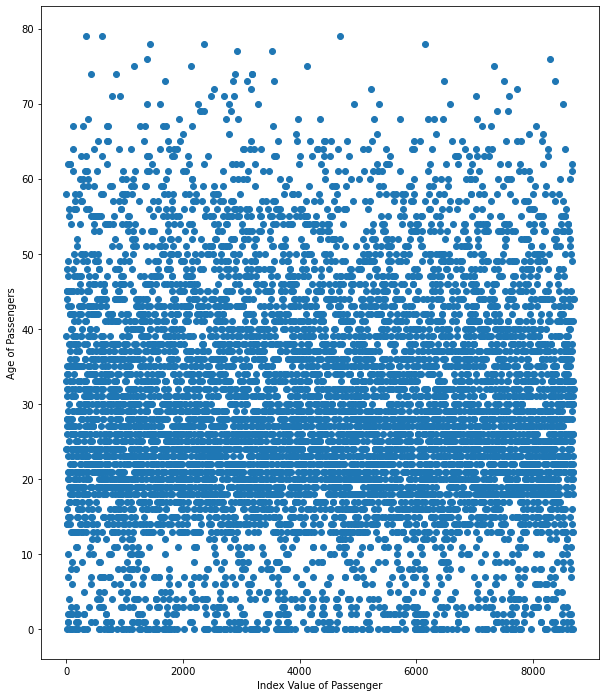

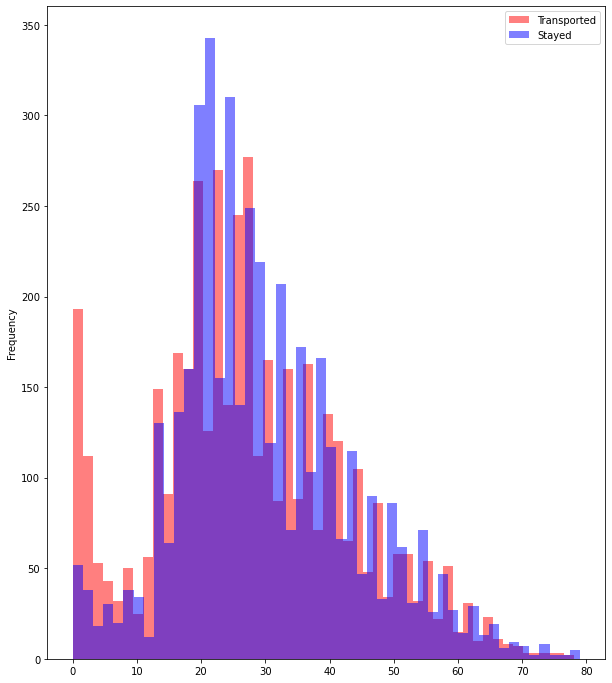

In [17]:
plt.figure(figsize=(10,12))
plt.scatter(list(df_train.index.values), df_train['Age'])
plt.xlabel('Index Value of Passenger')
plt.ylabel('Age of Passengers')
plt.show()

#hist_trans(df_train, 'Age')
plt.figure(figsize=(10,12))
transported = df_train[df_train["Transported"] == True]
stayed = df_train[df_train["Transported"] == False]
transported['Age'].plot.hist(alpha=0.5,color='red',bins=50)
stayed['Age'].plot.hist(alpha=0.5,color='blue',bins=50)
plt.legend(['Transported','Stayed'])
plt.show()

In [18]:
#Function to put data frame column values in to bins
def process_bins(df,column,cut_points,label_names):
    df[column] = df[column].fillna(-0.5)
    df[column+'_Categories'] = pd.cut(df[column],cut_points,labels=label_names)
    return df


In [19]:
#Putting ages in to bins
#It looks like babies are just listed as age 0
cut_points = [-1, -0.1, 2, 9.9, 17.9, 24.9, 59.9, 100]
label_names = ['Missing', 'Infant', 'Child', 'Teenager', 'Young Adult', 'Adult', 'Senior']
df_train = process_bins(df_train,'Age', cut_points, label_names)
df_test = process_bins(df_test,'Age', cut_points, label_names)

df_train.head(7)
#df_train[df_train['Age']<1].head(10)

PassengerId HomePlanet CryoSleep  Cabin    Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P    TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S    TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S    TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S    TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S    TRAPPIST-1e  16.0  False   
5     0005_01      Earth     False  F/0/P  PSO J318.5-22  44.0  False   
6     0006_01      Earth     False  F/2/S    TRAPPIST-1e  26.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck  Transported ID_Group  \
0          0.0        0.0           0.0     0.0     0.0        False     0001   
1        109.0        9.0          25.0   549.0    44.0         True     0002   
2         43.0     3576.0           0.0  6715.0    49.0        False     0003   
3          0.0     1283.0         371.0  3329.0   193.0        False     0003   
4        303.0       70.0         151.0   565.0     2.0         True     0004   
5          0.0      483.0           0.0   291.0     0.0         True     0005   
6         42.0     1539.0           3.0     0.0     0.0         True     0006   

  Age_Categories  
0          Adult  
1    Young Adult  
2          Adult  
3          Adult  
4       Teenager  
5          Adult  
6          Adult

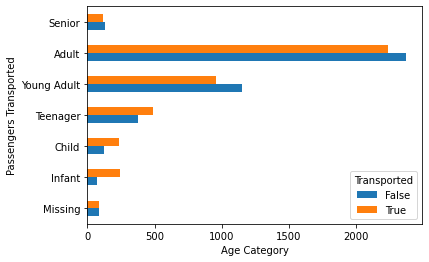

In [20]:
#Ploting Age bins vs Transported

pd.pivot_table(df_train,index = 'Age_Categories', columns = 'Transported',aggfunc ='size').plot.barh()
plt.xlabel('Age Category')
plt.ylabel('Passengers Transported')
plt.show()

In [21]:
#Analyzing Families
families = df_train.groupby(['ID_Group','Age_Categories']).size().unstack('Age_Categories')
families.head(10)

Age_Categories  Missing  Infant  Child  Teenager  Young Adult  Adult  Senior
ID_Group                                                                    
0001                  0       0      0         0            0      1       0
0002                  0       0      0         0            1      0       0
0003                  0       0      0         0            0      2       0
0004                  0       0      0         1            0      0       0
0005                  0       0      0         0            0      1       0
0006                  0       0      0         0            0      2       0
0007                  0       0      0         0            0      1       0
0008                  0       0      0         1            0      2       0
0009                  0       0      0         0            0      1       0
0010                  0       0      0         0            0      1       0

In [22]:
#Total members in a family
df_train['family_sum'] = df_train['Age_Categories'].groupby(df_train['ID_Group']).transform('count')
#total number of kids in each family
df_kids = df_train.loc[(df_train['Age_Categories']=='Infant')|(df_train['Age_Categories']=='Child')|(df_train['Age_Categories']=='Teenager'),
                       ['ID_Group','Age_Categories']]
df_train['family_kid_num'] = df_kids['Age_Categories'].groupby(df_kids['ID_Group']).transform('count')
df_train['family_kid_num'] = df_train['family_kid_num'].groupby(df_train['ID_Group']).transform('count')

#families with infants and children
df_kids = df_train.loc[(df_train['Age_Categories']=='Infant')|(df_train['Age_Categories']=='Child'),
                       ['ID_Group','Age_Categories']]
df_train['family_small_kids'] = df_kids['Age_Categories'].groupby(df_kids['ID_Group']).transform('count')
df_train['family_small_kids'] = df_train['family_small_kids'].groupby(df_train['ID_Group']).transform('count')

#families with teens
df_kids = df_train.loc[df_train['Age_Categories']=='Teenager',
                       ['ID_Group','Age_Categories']]
df_train['family_teen'] = df_kids['Age_Categories'].groupby(df_kids['ID_Group']).transform('count')
df_train['family_teen'] = df_train['family_teen'].groupby(df_train['ID_Group']).transform('count')

#kids traveling without adults
df_train['kids_without_adults'] = df_train.apply(lambda x: 1 if (x['family_sum'] - x['family_kid_num']) == 0 else 0, axis=1)

df_train[df_train['family_sum']>1].head(15)
#df_train[df_train['family_sum','family_kid_num']].head(25)

PassengerId HomePlanet CryoSleep  Cabin    Destination   Age    VIP  \
2      0003_01     Europa     False  A/0/S    TRAPPIST-1e  58.0   True   
3      0003_02     Europa     False  A/0/S    TRAPPIST-1e  33.0  False   
6      0006_01      Earth     False  F/2/S    TRAPPIST-1e  26.0  False   
7      0006_02      Earth      True  G/0/S    TRAPPIST-1e  28.0  False   
9      0008_01     Europa      True  B/1/P    55 Cancri e  14.0  False   
10     0008_02     Europa      True  B/1/P    TRAPPIST-1e  34.0  False   
11     0008_03     Europa     False  B/1/P    55 Cancri e  45.0  False   
19     0017_01      Earth     False  G/0/P    TRAPPIST-1e   0.0  False   
20     0017_02      Earth     False  F/6/P    55 Cancri e  14.0  False   
21     0020_01      Earth      True  E/0/S    TRAPPIST-1e   1.0  False   
22     0020_02      Earth      True  E/0/S    55 Cancri e  49.0  False   
23     0020_03      Earth      True  E/0/S    55 Cancri e  29.0  False   
24     0020_04      Earth     False  E/0/S    TRAPPIST-1e  10.0  False   
25     0020_05      Earth      True  E/0/S  PSO J318.5-22   1.0  False   
26     0020_06      Earth     False  E/0/S    TRAPPIST-1e   7.0  False   

    RoomService  FoodCourt  ShoppingMall     Spa  VRDeck  Transported  \
2          43.0     3576.0           0.0  6715.0    49.0        False   
3           0.0     1283.0         371.0  3329.0   193.0        False   
6          42.0     1539.0           3.0     0.0     0.0         True   
7           0.0        0.0           0.0     0.0     0.0         True   
9           0.0        0.0           0.0     0.0     0.0         True   
10          0.0        0.0           0.0     0.0     0.0         True   
11         39.0     7295.0         589.0   110.0   124.0         True   
19          0.0        0.0           0.0     0.0     0.0         True   
20        412.0        0.0           1.0     0.0   679.0        False   
21          0.0        0.0           0.0     0.0     0.0        False   
22          0.0        0.0           0.0     0.0     0.0        False   
23          0.0        0.0           0.0     0.0     0.0        False   
24          0.0        0.0           0.0     0.0     0.0         True   
25          0.0        0.0           0.0     0.0     0.0        False   
26          0.0        0.0           0.0     0.0     0.0        False   

   ID_Group Age_Categories  family_sum  family_kid_num  family_small_kids  \
2      0003          Adult           2               0                  0   
3      0003          Adult           2               0                  0   
6      0006          Adult           2               0                  0   
7      0006          Adult           2               0                  0   
9      0008       Teenager           3               1                  0   
10     0008          Adult           3               1                  0   
11     0008          Adult           3               1                  0   
19     0017         Infant           2               2                  1   
20     0017       Teenager           2               2                  1   
21     0020         Infant           6               4                  3   
22     0020          Adult           6               4                  3   
23     0020          Adult           6               4                  3   
24     0020       Teenager           6               4                  3   
25     0020         Infant           6               4                  3   
26     0020          Child           6               4                  3   

    family_teen  kids_without_adults  
2             0                    0  
3             0                    0  
6             0                    0  
7             0                    0  
9             1                    0  
10            1                    0  
11            1                    0  
19            1                    1  
20            1                    1  
21            1           

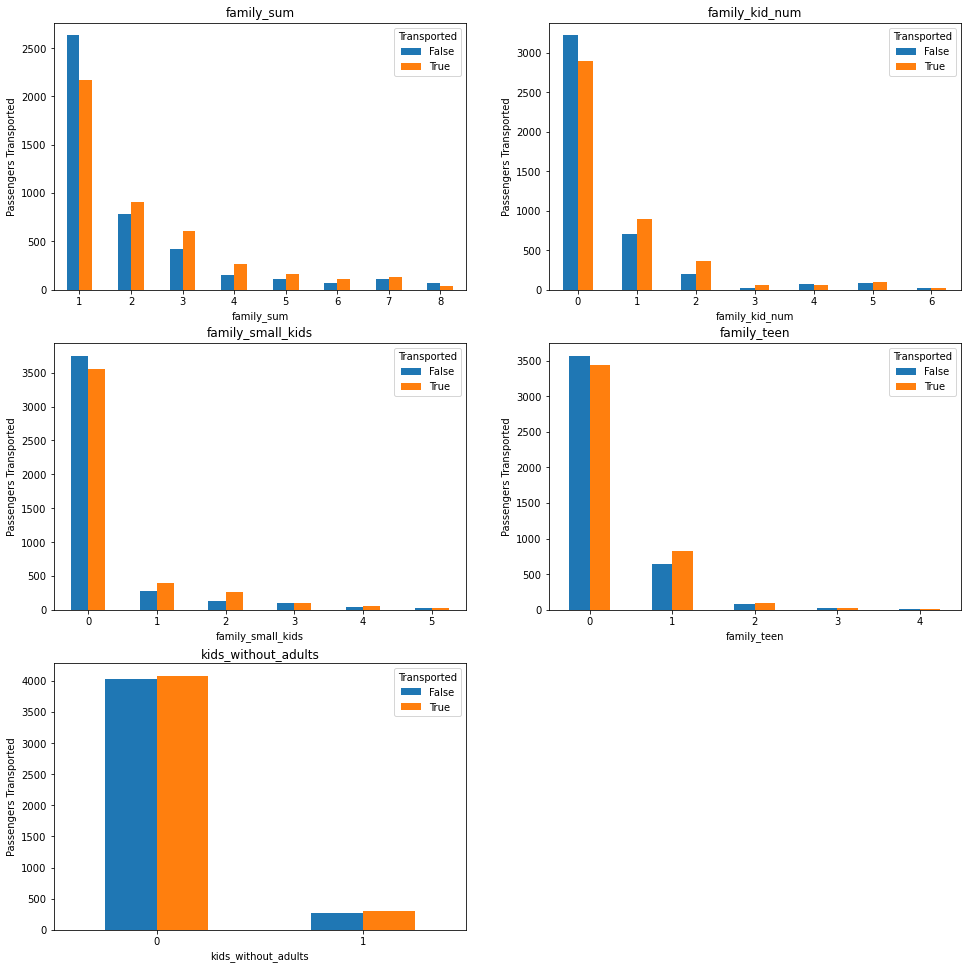

In [23]:
#Plots to compare different families
family_list = ['family_sum', 'family_kid_num', 'family_small_kids', 'family_teen', 'kids_without_adults']

fig = plt.figure(figsize=(18,18))
for i, feat in zip(range(1,6), family_list):
    ax_i = plt.subplot(3, 2, i)
    family_group = df_train.groupby([feat,'Transported']).size().unstack('Transported')
    family_group.plot(kind='bar', ax=ax_i)
    plt.setp(ax_i.get_xticklabels(), ha="center", rotation=0)
    ax_i.set_xlabel(feat)
    ax_i.set_ylabel('Passengers Transported')
    ax_i.set_title(feat)

plt.subplots_adjust(left=0.1,
                    bottom=0.5, 
                    right=0.8, 
                    top=1.2, 
                    wspace=0.2, 
                    hspace=0.2)

plt.show()

In [24]:
#See list of columns again
df_train.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Transported', 'ID_Group', 'Age_Categories', 'family_sum',
       'family_kid_num', 'family_small_kids', 'family_teen',
       'kids_without_adults'],
      dtype='object')

In [25]:
#Reviewing all Money Spent columns

#list of all location money is spent on the spaceship
spend_locations = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

#Description of how much money was spent at each location
for location in spend_locations:
    print(df_train[location].describe())
    print('\n')    

count     8580.000000
mean       222.906876
std        664.368930
min          0.000000
25%          0.000000
50%          0.000000
75%         44.000000
max      14327.000000
Name: RoomService, dtype: float64


count     8580.000000
mean       454.339977
std       1605.430304
min          0.000000
25%          0.000000
50%          0.000000
75%         70.000000
max      29813.000000
Name: FoodCourt, dtype: float64


count     8581.000000
mean       171.785573
std        601.581625
min          0.000000
25%          0.000000
50%          0.000000
75%         24.000000
max      23492.000000
Name: ShoppingMall, dtype: float64


count     8575.000000
mean       308.780292
std       1132.710170
min          0.000000
25%          0.000000
50%          0.000000
75%         58.000000
max      22408.000000
Name: Spa, dtype: float64


count     8567.000000
mean       302.648535
std       1141.855811
min          0.000000
25%          0.000000
50%          0.000000
75%         44.000000
max    

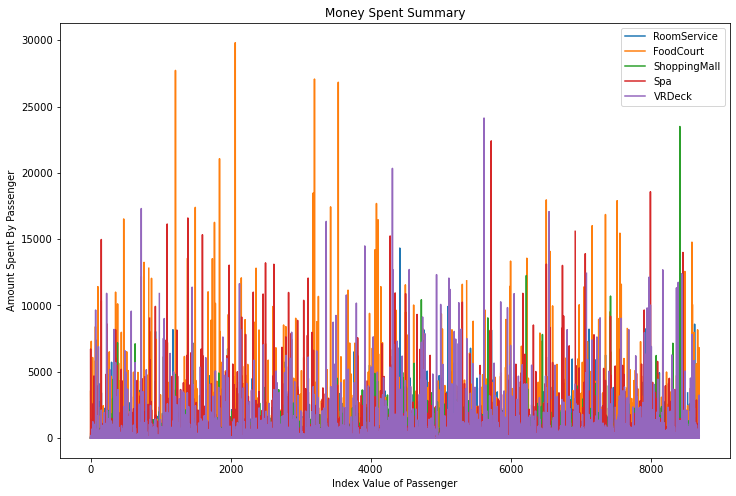

In [26]:
#Plotting raw spending columns
#list of spending locations -> spend_locations

plt.figure(figsize=(12,8))
for location in spend_locations:
    plt.plot(list(df_train.index.values),
             df_train[location],
             label=location)
plt.legend()
plt.title('Money Spent Summary')
plt.xlabel('Index Value of Passenger')
plt.ylabel('Amount Spent By Passenger')
plt.show()

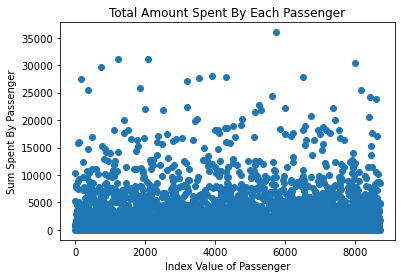

In [27]:
#Total amount each persson spent
#spend_location-> list of location to spend money
df_train['Spend_Sum'] = df_train[spend_locations].sum(axis=1)
df_test['Spend_Sum'] = df_train[spend_locations].sum(axis=1)

plt.scatter(list(df_train.index.values) , df_train['Spend_Sum'])
plt.title('Total Amount Spent By Each Passenger')
plt.xlabel('Index Value of Passenger')
plt.ylabel('Sum Spent By Passenger')
plt.show()

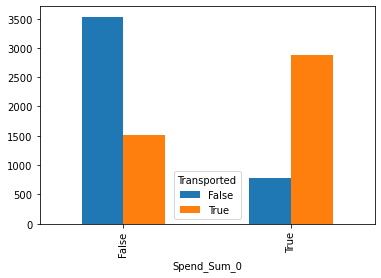

In [28]:
#If they spent money at all vs transported
df_train['Spend_Sum_0'] = df_train.apply(lambda x: True if x['Spend_Sum'] == 0 else False, axis=1)
df_test['Spend_Sum_0'] = df_train.apply(lambda x: True if x['Spend_Sum'] == 0 else False, axis=1)

spend_sum = df_train.groupby(['Spend_Sum_0','Transported']).size().unstack('Transported')
spend_sum.plot(kind='bar')
plt.show()

In [29]:
# Putting money spent in location in to bins
spend_loations = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck','Spend_Sum']

cut_points = [-1, -0.1, 0.1, 500, 1000, 5000,10000, 30000]
label_names = ['Missing', '$0', '$0.1_500', '$501_1000','$1001_5000','$5001_10000', '$10001_30000']

#list of spending locations -> spend_locations
for location in spend_locations:
    df_train = process_bins(df_train, location, cut_points, label_names)
    df_test = process_bins(df_test, location, cut_points, label_names)

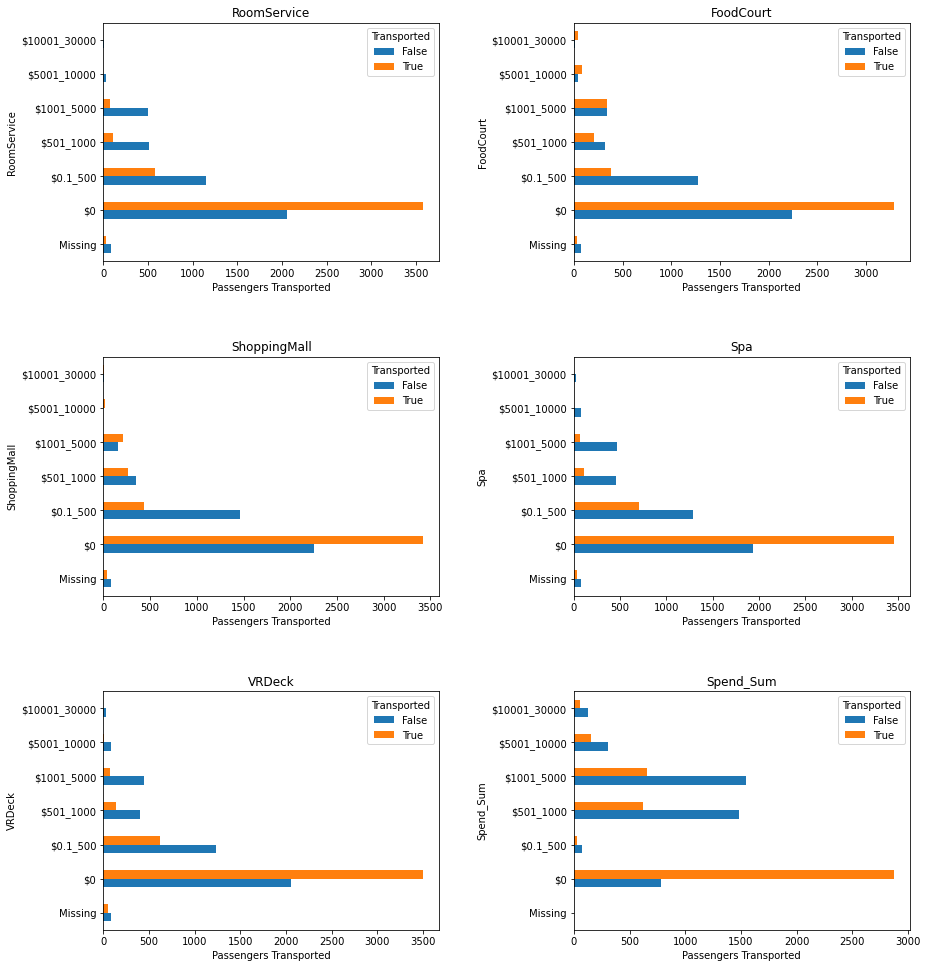

In [30]:
#Plotting the money spent at each location
#list of spending locations -> spend_locations
fig = plt.figure(figsize=(14,18))
for i, location in zip(range(1,7), spend_locations):
    ax_i = plt.subplot(3, 2, i)
    #spend_pivot = df_train.pivot_table(index=location+'_Categories', values='Transported', aggfunc=np.sum)
    spend_pivot = pd.pivot_table(df_train,index = location+'_Categories', columns = 'Transported',aggfunc ='size')
    spend_pivot.plot(kind='barh', ax=ax_i)
    plt.setp(ax_i.get_xticklabels(), ha="center", rotation=0)
    ax_i.set_ylabel(location)
    ax_i.set_xlabel('Passengers Transported')
    ax_i.set_title(location)

# plt.subplot(3,2,6)
# for location in spend_locations:
#     plt.plot(list(df_train.index.values),
#              df_train[location],
#              label=location)
# plt.legend()
# plt.title('Summary of All Money Spent')
# plt.xlabel('Index Value of Passenger')
# plt.ylabel('Amount Spent By Passenger')

plt.subplots_adjust(left=0.1,
                    bottom=0.5, 
                    right=0.9, 
                    top=1.2, 
                    wspace=0.4, 
                    hspace=0.4)

plt.show()

In [31]:
#Since $0 leads for all spending locations
#compare $0 to money spent
#list of spending locations -> spend_locations

for location in spend_locations:
    df_train[location+'_0'] = df_train.apply(lambda x: 'True' if x[location] == 0 
                                              else ('False' if x[location] > 0 else 'Missing'), axis=1)
    df_test[location+'_0'] = df_test.apply(lambda x: 'True' if x[location] == 0 
                                              else ('False' if x[location] > 0 else 'Missing'), axis=1)

df_train['RoomService_0'].value_counts()

True       5645
False      2935
Missing     113
Name: RoomService_0, dtype: int64

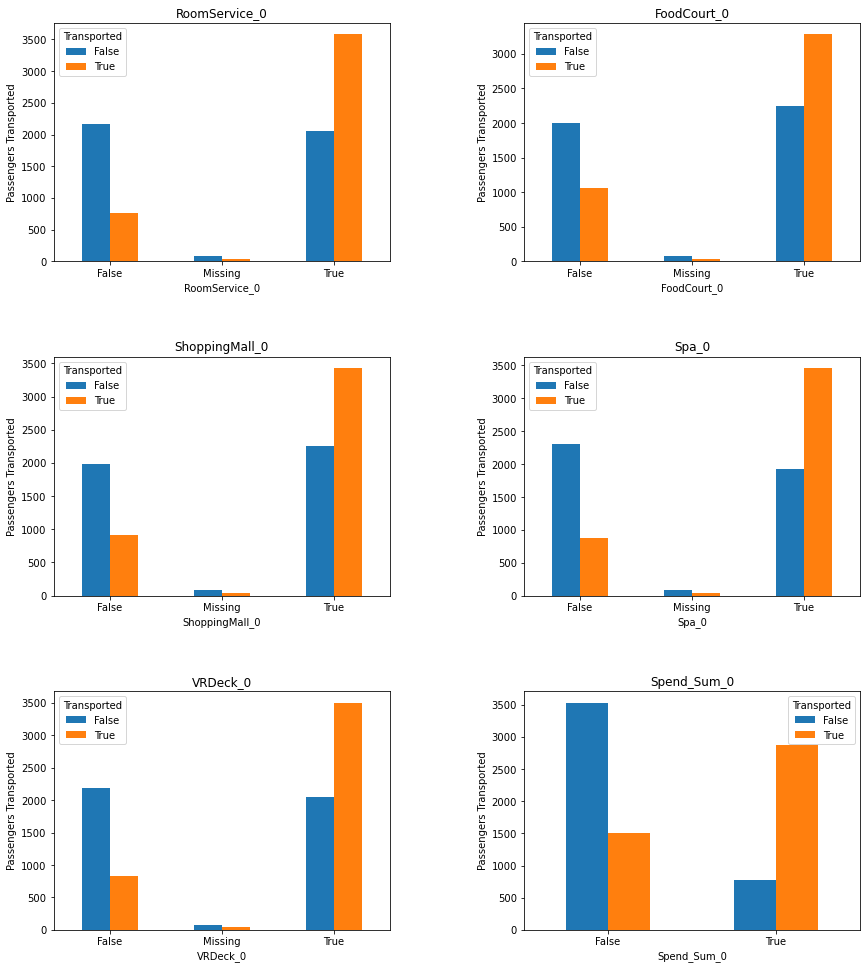

In [32]:
#Plot $0 to if they spent any amount of money at the location
features_0 = ['RoomService_0', 'FoodCourt_0', 'ShoppingMall_0', 'Spa_0', 'VRDeck_0', 'Spend_Sum_0']

fig = plt.figure(figsize=(14,18))
for i, feat in zip(range(1,7), features_0):
    ax_i = plt.subplot(3, 2, i)
    money_group = df_train.groupby([feat,'Transported']).size().unstack('Transported')
    money_group.plot(kind='bar', ax=ax_i)
    plt.setp(ax_i.get_xticklabels(), ha="center", rotation=0)
    ax_i.set_xlabel(feat)
    ax_i.set_ylabel('Passengers Transported')
    ax_i.set_title(feat)

plt.subplots_adjust(left=0.1,
                    bottom=0.5, 
                    right=0.9, 
                    top=1.2, 
                    wspace=0.4, 
                    hspace=0.4)

plt.show()

In [33]:
#Making sure if the passenger is in suspended animation they don't spend money
df_cryo = df_train[df_train['CryoSleep']==True]
df_cryo['Spend_Sum_0'].value_counts()

True    3037
Name: Spend_Sum_0, dtype: int64

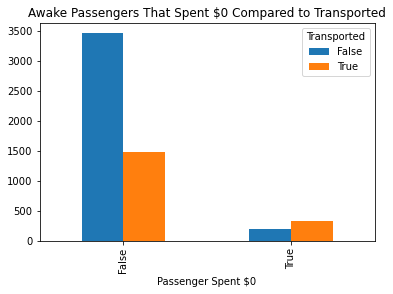

In [34]:
#Seeing how many spent $0 that were not Cryo Sleep
df_awake = df_train[df_train['CryoSleep']==False]
awake_sum = df_awake.groupby(['Spend_Sum_0','Transported']).size().unstack('Transported')
awake_sum.plot(kind='bar')
plt.title('Awake Passengers That Spent $0 Compared to Transported')
plt.xlabel('Passenger Spent $0')
plt.show()

In [35]:
df_train.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Transported', 'ID_Group', 'Age_Categories', 'family_sum',
       'family_kid_num', 'family_small_kids', 'family_teen',
       'kids_without_adults', 'Spend_Sum', 'Spend_Sum_0',
       'RoomService_Categories', 'FoodCourt_Categories',
       'ShoppingMall_Categories', 'Spa_Categories', 'VRDeck_Categories',
       'Spend_Sum_Categories', 'RoomService_0', 'FoodCourt_0',
       'ShoppingMall_0', 'Spa_0', 'VRDeck_0'],
      dtype='object')

In [36]:
#Removing the $0 spending from each location because it is to similar to Spend_Sum_0
#col_remove = ['RoomService_Categories', 'FoodCourt_Categories', 
#              'ShoppingMall_Categories', 'Spa_Categories', 'VRDeck_Categories']
col_remove = ['RoomService_0', 'FoodCourt_0','ShoppingMall_0', 'Spa_0', 'VRDeck_0']
df_train = df_train.drop(col_remove, axis=1)
df_test = df_test.drop(col_remove, axis=1)

In [37]:
df_train.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Transported', 'ID_Group', 'Age_Categories', 'family_sum',
       'family_kid_num', 'family_small_kids', 'family_teen',
       'kids_without_adults', 'Spend_Sum', 'Spend_Sum_0',
       'RoomService_Categories', 'FoodCourt_Categories',
       'ShoppingMall_Categories', 'Spa_Categories', 'VRDeck_Categories',
       'Spend_Sum_Categories'],
      dtype='object')

In [38]:
#convert Cabin column in to two categorical columns:
#Deck and Side (P for port or S for Starboard)
df_train.Cabin.head(10)

df_train['Cabin_Deck'] = df_train.Cabin.str.split('/').str.get(0)
df_train['Cabin_Side'] = df_train.Cabin.str.split('/').str.get(-1)
df_test['Cabin_Deck'] = df_test.Cabin.str.split('/').str.get(0)
df_test['Cabin_Side'] = df_test.Cabin.str.split('/').str.get(-1)

df_train[['Cabin_Deck','Cabin_Side']].head()

Cabin_Deck Cabin_Side
0          B          P
1          F          S
2          A          S
3          A          S
4          F          S

In [39]:
#Looking at how many rows have multiple missing data columns
print(df_train.isnull().sum())
print('\n')
print(df_train.isnull().sum(axis=1).value_counts())
#Total Number of rows with missing data: 957

PassengerId                  0
HomePlanet                 201
CryoSleep                  217
Cabin                      199
Destination                182
Age                          0
VIP                        203
RoomService                  0
FoodCourt                    0
ShoppingMall                 0
Spa                          0
VRDeck                       0
Transported                  0
ID_Group                     0
Age_Categories               0
family_sum                   0
family_kid_num               0
family_small_kids            0
family_teen                  0
kids_without_adults          0
Spend_Sum                    0
Spend_Sum_0                  0
RoomService_Categories       0
FoodCourt_Categories         0
ShoppingMall_Categories      0
Spa_Categories               0
VRDeck_Categories            0
Spend_Sum_Categories         4
Cabin_Deck                 199
Cabin_Side                 199
dtype: int64


0    7732
1     741
3     178
4      21
2      20
5    

In [40]:
#Fill all N/A data with missing in remaining categorical columns
df_train.fillna('Missing', inplace=True)
df_test.fillna('Missing', inplace=True)
#df_train.head(10)
df_train.isnull().sum()

PassengerId                0
HomePlanet                 0
CryoSleep                  0
Cabin                      0
Destination                0
Age                        0
VIP                        0
RoomService                0
FoodCourt                  0
ShoppingMall               0
Spa                        0
VRDeck                     0
Transported                0
ID_Group                   0
Age_Categories             0
family_sum                 0
family_kid_num             0
family_small_kids          0
family_teen                0
kids_without_adults        0
Spend_Sum                  0
Spend_Sum_0                0
RoomService_Categories     0
FoodCourt_Categories       0
ShoppingMall_Categories    0
Spa_Categories             0
VRDeck_Categories          0
Spend_Sum_Categories       0
Cabin_Deck                 0
Cabin_Side                 0
dtype: int64

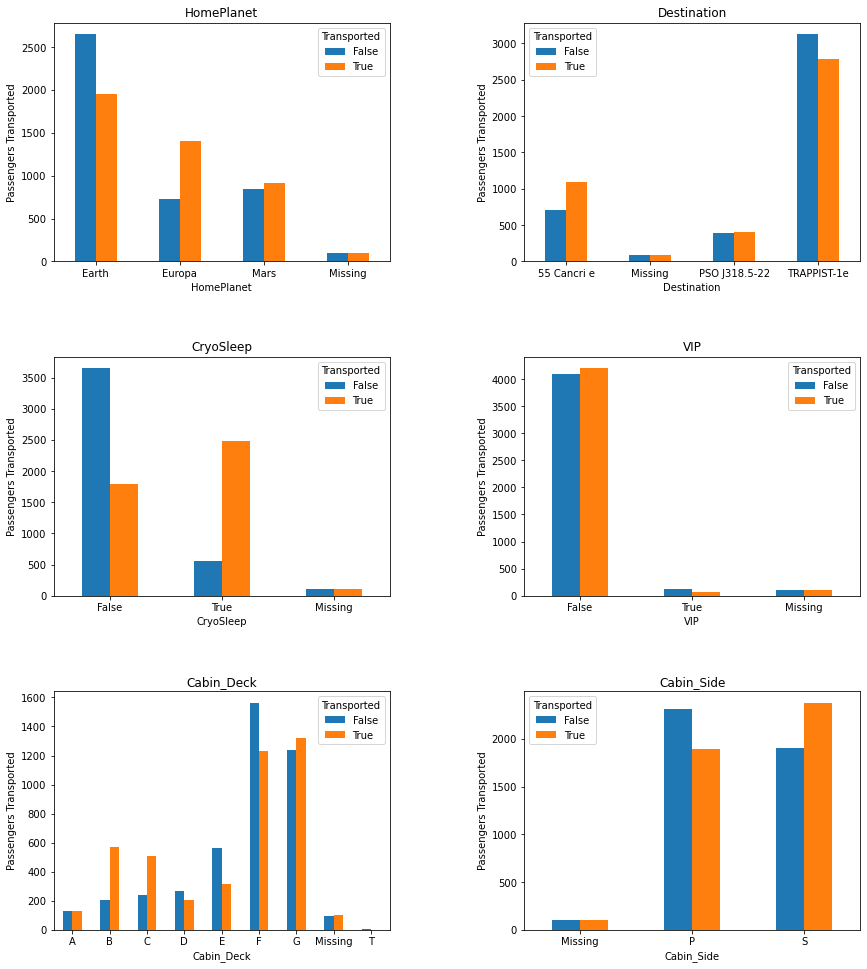

In [41]:
#Plot Remaining Categorical Data Columns
features = ['HomePlanet', 'Destination', 'CryoSleep', 'VIP', 'Cabin_Deck', 'Cabin_Side']

#df_train.groupby('HomePlanet',as_index=False).agg({'HomePlanet': lambda x : ','.join(x.unique()), 'Transported':'sum'})
#df_train.groupby(['HomePlanet','Transported']).size().unstack('Transported').plot.bar()

fig = plt.figure(figsize=(14,18))
for i, feat in zip(range(1,7), features):
    ax_i = plt.subplot(3, 2, i)
    cat_group = df_train.groupby([feat,'Transported']).size().unstack('Transported')
    cat_group.plot(kind='bar', ax=ax_i)
    plt.setp(ax_i.get_xticklabels(), ha="center", rotation=0)
    ax_i.set_xlabel(feat)
    ax_i.set_ylabel('Passengers Transported')
    ax_i.set_title(feat)

plt.subplots_adjust(left=0.1,
                    bottom=0.5, 
                    right=0.9, 
                    top=1.2, 
                    wspace=0.4, 
                    hspace=0.4)

plt.show()

In [42]:
df_train.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Transported', 'ID_Group', 'Age_Categories', 'family_sum',
       'family_kid_num', 'family_small_kids', 'family_teen',
       'kids_without_adults', 'Spend_Sum', 'Spend_Sum_0',
       'RoomService_Categories', 'FoodCourt_Categories',
       'ShoppingMall_Categories', 'Spa_Categories', 'VRDeck_Categories',
       'Spend_Sum_Categories', 'Cabin_Deck', 'Cabin_Side'],
      dtype='object')

In [43]:
df_train.dtypes

PassengerId                  object
HomePlanet                   object
CryoSleep                    object
Cabin                        object
Destination                  object
Age                         float64
VIP                          object
RoomService                 float64
FoodCourt                   float64
ShoppingMall                float64
Spa                         float64
VRDeck                      float64
Transported                    bool
ID_Group                     object
Age_Categories             category
family_sum                    int64
family_kid_num                int64
family_small_kids             int64
family_teen                   int64
kids_without_adults           int64
Spend_Sum                   float64
Spend_Sum_0                  object
RoomService_Categories     category
FoodCourt_Categories       category
ShoppingMall_Categories    category
Spa_Categories             category
VRDeck_Categories          category
Spend_Sum_Categories       c

In [44]:
#Calculate percentage of True/False/Missing from each categorical column
#bool_features = ['CryoSleep','VIP','RoomService_0','FoodCourt_0','ShoppingMall_0','Spa_0','VRDeck_0','Spend_Sum_0']
bool_features = ['CryoSleep','VIP']
for feature in bool_features:
    bool_percent = df_train[feature].value_counts() / len(df_train)
    print('Percentage of Values for '+feature+' :')
    print(bool_percent)
    print('\n')


Percentage of Values for CryoSleep :
False      0.625676
True       0.349362
Missing    0.024963
Name: CryoSleep, dtype: float64


Percentage of Values for VIP :
False      0.953756
Missing    0.023352
True       0.022892
Name: VIP, dtype: float64




In [45]:
#Since the missing values for each feature is less than 1% I'm not going to remove the missing rows yet
#Instead converting True = 1, False = 0 and Missing = -1
#list of object boolean features -> bool_features
for feature in bool_features:
    #train df
    df_train[feature] = df_train[feature].replace({'False': 0, 'True': 1, 'Missing':-1})
    df_train[feature] = df_train[feature].replace({False: 0, True: 1, 'Missing':-1})
    #test df
    df_test[feature] = df_test[feature].replace({'False': 0, 'True': 1, 'Missing':-1})
    df_test[feature] = df_test[feature].replace({False: 0, True: 1, 'Missing':-1})
    
#Converting Transported to 1/0 values
df_train.Transported = df_train.Transported.replace({True: 1, False: 0})

df_train[['CryoSleep', 'VIP','Transported']].describe(include='all')

CryoSleep          VIP  Transported
count  8693.000000  8693.000000  8693.000000
mean      0.324399    -0.000460     0.503624
std       0.518768     0.215056     0.500016
min      -1.000000    -1.000000     0.000000
25%       0.000000     0.000000     0.000000
50%       0.000000     0.000000     1.000000
75%       1.000000     0.000000     1.000000
max       1.000000     1.000000     1.000000

In [46]:
# print(df_train['CryoSleep'].value_counts())
# print('\n')
# print(df_train['FoodCourt_0'].value_counts())
# print('\n')
# print(df_train['Spend_Sum_0'].value_counts())
#df_train.head(15)

In [47]:
#Dummy values for all categorical data
cat_features = ['HomePlanet', 'CryoSleep', 'Destination', 
                 'VIP','Age_Categories', 'RoomService_Categories',
                 'FoodCourt_Categories','ShoppingMall_Categories',
                 'Spa_Categories','VRDeck_Categories','Cabin_Deck',
                 'Cabin_Side','Spend_Sum']

#cat_features = ['HomePlanet', 'Destination', 'Age_Categories', 'Cabin_Deck', 'Cabin_Side']

dummy_train_df = pd.get_dummies(df_train[cat_features])
df_train = pd.concat([df_train, dummy_train_df], axis=1)

dummy_test_df = pd.get_dummies(df_test[cat_features])
df_test = pd.concat([df_test, dummy_test_df], axis=1)

df_train.head(10)

PassengerId HomePlanet  CryoSleep  Cabin    Destination   Age  VIP  \
0     0001_01     Europa          0  B/0/P    TRAPPIST-1e  39.0    0   
1     0002_01      Earth          0  F/0/S    TRAPPIST-1e  24.0    0   
2     0003_01     Europa          0  A/0/S    TRAPPIST-1e  58.0    1   
3     0003_02     Europa          0  A/0/S    TRAPPIST-1e  33.0    0   
4     0004_01      Earth          0  F/1/S    TRAPPIST-1e  16.0    0   
5     0005_01      Earth          0  F/0/P  PSO J318.5-22  44.0    0   
6     0006_01      Earth          0  F/2/S    TRAPPIST-1e  26.0    0   
7     0006_02      Earth          1  G/0/S    TRAPPIST-1e  28.0    0   
8     0007_01      Earth          0  F/3/S    TRAPPIST-1e  35.0    0   
9     0008_01     Europa          1  B/1/P    55 Cancri e  14.0    0   

   RoomService  FoodCourt  ShoppingMall  ...  Cabin_Deck_C  Cabin_Deck_D  \
0          0.0        0.0           0.0  ...             0             0   
1        109.0        9.0          25.0  ...             0             0   
2         43.0     3576.0           0.0  ...             0             0   
3          0.0     1283.0         371.0  ...             0             0   
4        303.0       70.0         151.0  ...             0             0   
5          0.0      483.0           0.0  ...             0             0   
6         42.0     1539.0           3.0  ...             0             0   
7          0.0        0.0           0.0  ...             0             0   
8          0.0      785.0          17.0  ...             0             0   
9          0.0        0.0           0.0  ...             0             0   

   Cabin_Deck_E Cabin_Deck_F Cabin_Deck_G  Cabin_Deck_Missing  Cabin_Deck_T  \
0             0            0            0                   0             0   
1             0            1            0                   0             0   
2             0            0            0                   0             0   
3             0            0            0                   0             0   
4             0            1            0                   0             0   
5             0            1            0                   0             0   
6             0            1            0                   0             0   
7             0            0            1                   0             0   
8             0            1            0                   0             0   
9             0            0            0                   0             0   

   Cabin_Side_Missing  Cabin_Side_P  Cabin_Side_S  
0                   0             1             0  
1                   0             0             1  
2                   0             0             1  
3                   0             0             1  
4                   0             0             1  
5                   0             1             0  
6                   0             0             1  
7                   0             0             1  
8                   0             0             1  
9                   0             1             0  

[10 rows x 95 columns]

In [48]:
#Clean the names of some of the columns
df_train.columns = df_train.columns.str.replace('_Categories_', '_')

In [49]:
print(df_train.shape)
print(df_test.shape)
df_train.columns

(8693, 95)
(4277, 89)


Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Transported', 'ID_Group', 'Age_Categories', 'family_sum',
       'family_kid_num', 'family_small_kids', 'family_teen',
       'kids_without_adults', 'Spend_Sum', 'Spend_Sum_0',
       'RoomService_Categories', 'FoodCourt_Categories',
       'ShoppingMall_Categories', 'Spa_Categories', 'VRDeck_Categories',
       'Spend_Sum_Categories', 'Cabin_Deck', 'Cabin_Side', 'CryoSleep', 'VIP',
       'Spend_Sum', 'HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars',
       'HomePlanet_Missing', 'Destination_55 Cancri e', 'Destination_Missing',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'Age_Missing',
       'Age_Infant', 'Age_Child', 'Age_Teenager', 'Age_Young Adult',
       'Age_Adult', 'Age_Senior', 'RoomService_Missing', 'RoomService_$0',
       'RoomService_$0.1_500', 'RoomService_$501_1000',
       'RoomSe

In [50]:
#Exporting Full Data Frame
#Next File will be performing the Machine Learning
#Duplicate columns and weak features will be removed in the Machine Learning File

#df_train.to_csv(data_file_path+'Analysis_Train_SpaceTitanic.csv',index=False)
#df_test.to_csv(data_file_path+'Analysis_Test_SpaceTitanic.csv', index=False)

In [51]:
df_train[['Spend_Sum','Spend_Sum_0']].head(10)

Spend_Sum  Spend_Sum Spend_Sum_0
0        0.0        0.0        True
1      736.0      736.0       False
2    10383.0    10383.0       False
3     5176.0     5176.0       False
4     1091.0     1091.0       False
5      774.0      774.0       False
6     1584.0     1584.0       False
7        0.0        0.0        True
8     1018.0     1018.0       False
9        0.0        0.0        True